<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Thank you for taking the time to improve the project! Now it's accepted. Good luck on the next sprint!
  
</div>

# Review
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but one task is missing: the mathematical proof that data obfuscation does not influence the model's quality. I gave you some hints, but if you still have trouble with it, contact the tutor. Good luck!

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Table of content

<div> 
    <ol>
      <li><a href="#1">Data Preprocessing & EDA</a></li>
      <li><a href="#2">Task 1. Similar Customers</a></li>
      <li><a href="#3">Task 2. Is Customer Likely to Receive Insurance Benefit?</a></li>
      <li><a href="#4">Task 3. Regression (with Linear Regression)</a></li>
      <li><a href="#5">Task 4. Obfuscating Data</a></li>
      <li><a href="#6"> Conclusions</a></li>
    </ol> 
</div>

# <a id="1"> Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4557,1,41.0,54000.0,4,0
1899,0,18.0,38000.0,2,0
3228,1,41.0,32300.0,0,0
4043,1,29.0,48100.0,2,0
4903,1,18.0,32800.0,1,0
2993,0,36.0,42000.0,0,0
2316,1,52.0,54700.0,0,2
3571,0,35.0,25700.0,1,0
2268,1,44.0,28400.0,0,1
299,0,39.0,43500.0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical
# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [7]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
df.head()

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


In [10]:
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

**Conclusion**

- The data looks good:
    - it contains 5000 rows and 5 columns
    - we renamed the colums to make the code look more consistent with its style.
    - we fixed the age type (from float to int)
    - we found no missing values
    
Let's move on to the EDA part

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

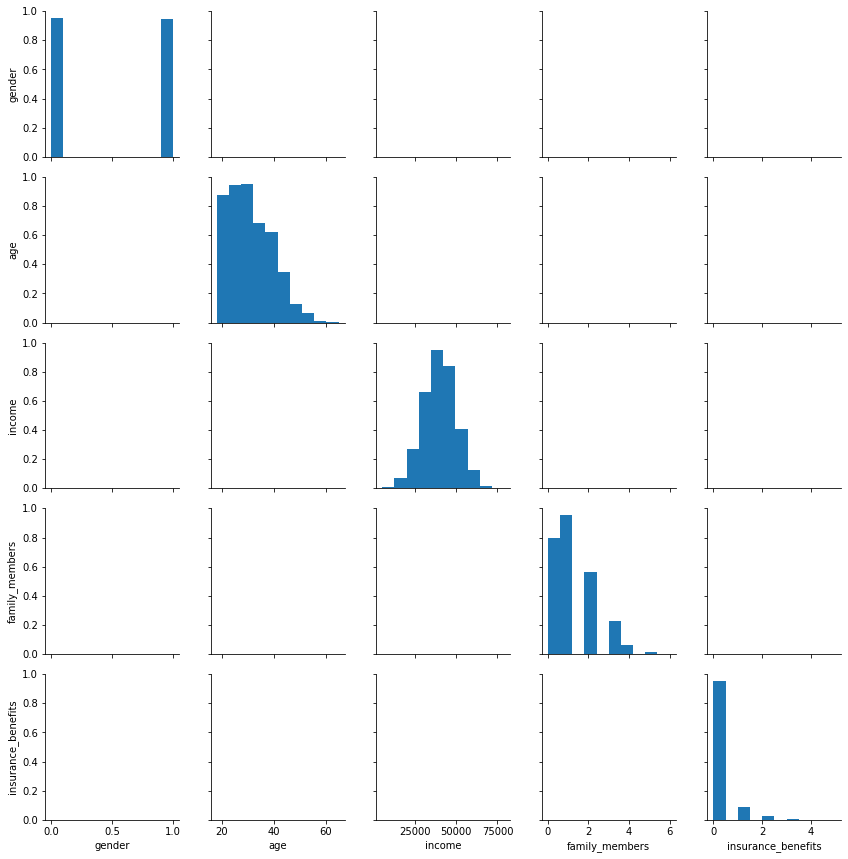

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# <a id="2"> Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric) 
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
The function for getting k nearest neighbors is correct
  
</div>

Scaling the data.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2350,0.0,0.307692,0.565823,0.166667,0
1599,1.0,0.753846,0.387342,0.666667,1
2630,1.0,0.430769,0.613924,0.000000,0
3909,1.0,0.507692,0.493671,0.500000,0
1999,1.0,0.523077,0.535443,0.500000,0


Now, let's get similar records for a given one for every combination

In [16]:
# euclidean distance with unscaled data
get_knn(df[feature_names], 0, 10, 'euclidean')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.000000
2022,1,41,49600.0,0,1.000000
1225,0,42,49600.0,0,1.732051
4031,1,44,49600.0,2,3.162278
3424,0,38,49600.0,0,3.316625
815,1,37,49600.0,2,4.123106
4661,0,45,49600.0,0,4.242641
2125,0,37,49600.0,2,4.242641
2349,1,46,49600.0,2,5.099020
3900,1,36,49600.0,0,5.099020


In [17]:
# euclidean distance with scaled data
get_knn(df_scaled[feature_names], 0, 10, 'euclidean')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.017754
4869,1.0,0.646154,0.637975,0.166667,0.018418
3275,1.0,0.646154,0.651899,0.166667,0.028550
1567,1.0,0.615385,0.602532,0.166667,0.029624
2103,1.0,0.630769,0.596203,0.166667,0.031646
3365,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.031693
3636,1.0,0.615385,0.600000,0.166667,0.031815


In [18]:
# manhattan (city block) distance with unscaled data
get_knn(df[feature_names], 0, 10, 'manhattan')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.0
2022,1,41,49600.0,0,1.0
1225,0,42,49600.0,0,3.0
4031,1,44,49600.0,2,4.0
815,1,37,49600.0,2,5.0
3424,0,38,49600.0,0,5.0
2125,0,37,49600.0,2,6.0
3900,1,36,49600.0,0,6.0
2349,1,46,49600.0,2,6.0
4661,0,45,49600.0,0,6.0


In [19]:
# manhattan (city block) distance with scaled data
get_knn(df_scaled[feature_names], 0, 10, 'manhattan')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.024245
4869,1.0,0.646154,0.637975,0.166667,0.025511
3365,1.0,0.630769,0.596203,0.166667,0.031646
2103,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.038364
4305,1.0,0.630769,0.588608,0.166667,0.039241
3275,1.0,0.646154,0.651899,0.166667,0.039435
1567,1.0,0.615385,0.602532,0.166667,0.040701


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

- The unscaled data affects the kNN algorithm because the algorithm is giving more importance features with higher ranging numbers. 
- In the task using euclidean distance, 
    - for unscaled data, the distance metric calculated ranges from 0.00 to 5.09, 
    - for scaled data, the distance metric range of 0.00 to 0.03. 
- This shows the impact of data scaling. 
- With data scaling, the distances are now more comparable than they were before.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Yep, exactly!
  
</div>

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

We can see just the 1st NN that is identical when applying Manhattan distance metric, the rest of the results are different.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
  
Not sure if you've understood the question correctly. The task means to compare the results with euclidean metric (applied to unscaled/scaled data) to the results with manhattan metric (applied to unscaled data). They look pretty similar to me. For example (on scaled data) with both euclidean and manhattan metric the top 3 neighbors of 0 are 2689, 133, 4869
  
</div>

<div class="alert alert-info">
  Thank you, I thought it was about just the Manhattan distance, yes indeed!
</div>

# <a id="3"> Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [20]:
# calculate the target
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
#<your code here>

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Yep, that's correct
  
</div>

In [21]:
# check for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts()
# <your code here>

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [22]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print(cm)

In [23]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

**Measure F1 metric on original data using KNN-based classifier**

In [24]:
# split data into train and test sets
train, test = train_test_split(df, test_size=0.3, stratify=df['insurance_benefits_received'], random_state=12345)

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

In [25]:
# fit the data
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
#prediction
knn.predict(X_test).sum()

68

In [27]:
# evaluate metrics
eval_classifier(y_test, knn.predict(X_test))

F1: 0.40
Confusion Matrix
[[1310   21]
 [ 122   47]]


In [28]:
# model performance using unscaled data and k from 1 to 10
k = np.arange(1, 11)
for k in k:
    print('F1 score and confusion matrix for k:', k)
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    eval_classifier(y_test, knn.predict(X_test))
    print()

F1 score and confusion matrix for k: 1
F1: 0.59
Confusion Matrix
[[1309   22]
 [  90   79]]

F1 score and confusion matrix for k: 2
F1: 0.39
Confusion Matrix
[[1324    7]
 [ 126   43]]

F1 score and confusion matrix for k: 3
F1: 0.40
Confusion Matrix
[[1310   21]
 [ 122   47]]

F1 score and confusion matrix for k: 4
F1: 0.16
Confusion Matrix
[[1325    6]
 [ 154   15]]

F1 score and confusion matrix for k: 5
F1: 0.15
Confusion Matrix
[[1320   11]
 [ 154   15]]

F1 score and confusion matrix for k: 6
F1: 0.06
Confusion Matrix
[[1331    0]
 [ 164    5]]

F1 score and confusion matrix for k: 7
F1: 0.07
Confusion Matrix
[[1330    1]
 [ 163    6]]

F1 score and confusion matrix for k: 8
F1: 0.05
Confusion Matrix
[[1331    0]
 [ 165    4]]

F1 score and confusion matrix for k: 9
F1: 0.05
Confusion Matrix
[[1331    0]
 [ 165    4]]

F1 score and confusion matrix for k: 10
F1: 0.00
Confusion Matrix
[[1331    0]
 [ 169    0]]



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- We can see here that *k* has an influence on evaluation metrics.
    - the higher *k* is, the lower F1 score is.
- The highest value of F1 score is obtained on *k* = 1

**Measure F1 metric on scaled data using KNN-based classifier**

In [29]:
# calculate target for scaled data
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)
df_scaled.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1.0,0.630769,0.627848,0.166667,0,0
1,0.0,0.707692,0.481013,0.166667,1,1
2,0.0,0.446154,0.265823,0.000000,0,0
3,0.0,0.323077,0.527848,0.333333,0,0
4,1.0,0.430769,0.330380,0.000000,0,0


In [30]:
#feature and traget for unscaled data
X = df[feature_names]
y = df['insurance_benefits_received']

In [31]:
# produce only feature columns for scaled data
X_scaled = df_scaled[feature_names]

In [32]:
# split data into train and test sets
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = train_test_split(
    X, y, X_scaled, test_size = 0.3, random_state=12345
)

In [33]:
# model performance using scaled data and k from 1 to 10
k = np.arange(1, 11)
for k in k:
    print('F1 score and confusion matrix for k:', k)
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    eval_classifier(y_test, y_pred)
    print()

F1 score and confusion matrix for k: 1
F1: 0.97
Confusion Matrix
[[1333    4]
 [   7  156]]

F1 score and confusion matrix for k: 2
F1: 0.93
Confusion Matrix
[[1336    1]
 [  21  142]]

F1 score and confusion matrix for k: 3
F1: 0.95
Confusion Matrix
[[1334    3]
 [  13  150]]

F1 score and confusion matrix for k: 4
F1: 0.91
Confusion Matrix
[[1334    3]
 [  25  138]]

F1 score and confusion matrix for k: 5
F1: 0.92
Confusion Matrix
[[1330    7]
 [  17  146]]

F1 score and confusion matrix for k: 6
F1: 0.90
Confusion Matrix
[[1335    2]
 [  27  136]]

F1 score and confusion matrix for k: 7
F1: 0.92
Confusion Matrix
[[1331    6]
 [  19  144]]

F1 score and confusion matrix for k: 8
F1: 0.90
Confusion Matrix
[[1333    4]
 [  26  137]]

F1 score and confusion matrix for k: 9
F1: 0.92
Confusion Matrix
[[1333    4]
 [  22  141]]

F1 score and confusion matrix for k: 10
F1: 0.88
Confusion Matrix
[[1333    4]
 [  32  131]]



- We can see here, with a scaled data, that F1 slightly decreased by inscreasing *k*

**The probability of paying any insurance benefit is:**

In [34]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd =  rnd_model_predict(P, y_test.shape[0]) # <your code here> 
        
    eval_classifier(y_test, y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[1337    0]
 [ 163    0]]

The probability: 0.11
F1: 0.11
Confusion Matrix
[[1180  157]
 [ 144   19]]

The probability: 0.50
F1: 0.16
Confusion Matrix
[[668 669]
 [ 90  73]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[   0 1337]
 [   0  163]]



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- The model is giving a highest score at p = 1 with F1 = 0.20

In [35]:
#myclassifier
class MyClassifier():
    def __init__(self, n_neighbors, metric='euclidean', threshold = 0.5):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.nn = sklearn.neighbors.NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
        self.threshold = threshold
        
    def fit(self, X, y):
        self.features = X
        self.target = y
        self.nn.fit(self.features)
        
    def predict(self, X):
        nbrs_distances, nbrs_indices = self.nn.kneighbors(X, self.n_neighbors, return_distance=True)
        probabilities = []
        for elem in nbrs_indices:
            probability = self.target.iloc[elem].mean()
            probabilities.append(probability)
        return (np.array(probabilities) >= self.threshold).astype(int)

In [36]:
model = MyClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

In [37]:
model.predict(X_test).sum()

63

In [38]:
knn.predict(X_test).sum()

1

In [39]:
(model.predict(X_test) != knn.predict(X_test)).sum()

62

**Conclusion**

- For unscaled data: k has an influence in evalution metrics. When k is high, F1 is low.
- For scaled data: k influence slightly F1 score, the higher k is the lower F1 is. And we also obtained higher values of F1 score.
- The dummy gave a highest score at p = 1 with F1 = 0.20, and we can say that all customers will benefit from the insurance.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Great, you successfully applied knn to a classification problem. As you confirmed, scaling greatly influences the quality of distance-based models like knn.
  
</div>

# <a id="4"> Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [40]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        # <your code here>

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Linear regression was implemented correctly!
  
</div>

In [41]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

**Linear Regression for original data**

In [42]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


**Linear Regression for scaled data**

In [43]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


**Conclusion**
- We can see that, comparing the RMSE and R2 score between scaled and unscaled data, the evaluation metric still gave the same result. 
- The difference we can see is in the weights of the models. On scaled data, the model trained is more interpretable than the unscaled data.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Well done!
  
</div>

# <a id="5"> Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Mupliplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [44]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [45]:
X = df_pn.to_numpy()

In [46]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generating a random matrix $P$.

In [47]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [48]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [49]:
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00,  1.85130588e-16, -2.97856902e-16,
        -3.91584367e-17],
       [ 6.23834470e-17,  1.00000000e+00, -7.10568689e-17,
         8.24459807e-17],
       [ 1.03941594e-17,  2.27454503e-17,  1.00000000e+00,
        -5.77784356e-17],
       [-1.02697151e-16, -1.69379178e-16, -2.49945035e-17,
         1.00000000e+00]])

- We can see here that P is invertible since we have Ones in the diagonal. 

Can you guess the customers' ages or income after the transformation?

In [50]:
X_prime = np.matmul(X, P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [51]:
X_rec = X_prime.dot(np.linalg.inv(P))
X_rec

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [52]:
print('Original data \n {}'.format(X[:3]))
print()
print('Transformed data \n {}'.format(X_prime[:3]))
print()
print('Reversed (recovered) data \n {}'.format(X_rec[:3]))
print()

Original data 
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

Transformed data 
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

Reversed (recovered) data 
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]]



You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

- This might be due to the precision of the numpy s calculation when data is close to 0.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Yep, that's pretty much it! You successfully tried obfuscating the data and recovering the original data using an inverse matrix.
  
</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

**Analytical proof**

- Given:

$$w_p = [(XP)^T XP]^{-1}(XP)^Ty \qquad \qquad $$

- expand $(XP)^T$ using reversivity of transpose property

$$w_p = [P^T X^T XP]^{-1} P^T X^T y\qquad \qquad$$

- aranging square brackets

$$w_p = (P^T (X^T X) P)^{-1} P^T X^T y \qquad \qquad$$

- expand the bracket $(P^T (X^T X) P)^{-1}$ 

$$w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \qquad \qquad$$

- since $(P^T)^{-1} P^T = P^T (P^T)^{-1}  = I$

$$w_p = P^{-1} (X^T X)^{-1} I X^T y \qquad \qquad$$

- applying identity property for multiplication $ I X^T = X^T I = X^T$

$$w_p = P^{-1} (X^T X)^{-1} X^T y \qquad \qquad$$

- subtituting $w = (X^T X)^{-1} X^T y$ into the previous equation 

$$w_p = P^{-1} w \qquad \qquad$$

**What would be predicted values with  $w_p$ ?**

- we have

$$a = Xw$$

- and 

$$a' = X'w_p$$

- where 

$$X' = XP$$

and$$w_p = P^{-1}w$$

- by substituting these values into $a'$ we will have:

$$\begin{align*}
    a'= XP.P^{-1}w = XIw \\
    \therefore a'= Xw = a
\end{align*}$$

**What does that mean for the quality of linear regression if you measure it with RMSE?**

- We have $a'$ and $a$ are the same, so the RMSE calculated for both the transformed and non transformed dataset will remain the same.
- And the quality of linear regression measured with RMSE will be similar. 

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Great, the proof is correct. 
  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
  
This task is missing. Basically, you just need to simplify the expresion for $w_p$ using the formulas from the appendix (keep in mind that $X$ is not invertible, but $X^T X$ is, so you've got to be careful not to use $X^{-1}$ in your proof), then use it to find the predictions of the new model and compare them to the old predictions. If you have trouble with this task, I suggest contacting the tutor (if you don't know how, ask the community manager).
  
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [53]:
rn = np.random.default_rng(seed=42)
P = rn.random(size=(X.shape[1], X.shape[1]))

In [54]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Is matrix P invertible?

In [55]:
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00,  1.85130588e-16, -2.97856902e-16,
        -3.91584367e-17],
       [ 6.23834470e-17,  1.00000000e+00, -7.10568689e-17,
         8.24459807e-17],
       [ 1.03941594e-17,  2.27454503e-17,  1.00000000e+00,
        -5.77784356e-17],
       [-1.02697151e-16, -1.69379178e-16, -2.49945035e-17,
         1.00000000e+00]])

In [56]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [57]:
# features
X = df_pn.to_numpy()

In [58]:
# target
y = df["insurance_benefits"].to_numpy()

- LR on original data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


- LR on obfuscated data

In [60]:
X_prime = X.dot(P)

X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(X_prime, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train_obs, y_train_obs)
print(lr.weights)

y_test_pred = lr.predict(X_test_obs)
eval_regressor(y_test_obs, y_test_pred)

[-0.94353901 -0.05791721 -0.01546567  0.09871889 -0.02397536]
RMSE: 0.34
R2: 0.66


- Using computational means, we obtained similar RMSE of 0.34 and $R^2$ score of 0.66 for both original and obfuscated data.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Great, you successfully experimentally confirmed that data obfuscation doesn't impact model's quality 
  
</div>

# <a id="1"> Conclusions

The business task of this project is data masking for the Sure Tomorrow insurance, by developing a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands.
1. First step, data discovery
    - we loaded the data that consists of 5000 rows and 5 columns. 
    - We renamed the columns and changed data type for the age feature from float to int. 
    - we've seen that there are no missing values in the data. 
    - 
2. EDA
    - We performed exploratory data analysis on the data and determined if scaling is affecting the kNN algorithm.
    - The unscaled data affects the kNN algorithm because the algorithm is giving more importance features with higher ranging numbers. 
    - using euclidean distance, for unscaled data, the distance metric calculated ranges from 0.00 to 5.09, whereas for scaled data, the distance metric range of 0.00 to 0.03. 
    - This shows the impact of data scaling. With data scaling, the distances are more comparable than with unscaled data.
3. We built a custom kNN classifier
    - we measured the quality 
        - F1 metric for k=1 to 10 for both the original data and the scaled one. 
    - we observed that for the original and unscaled data, k influences the evaluation metric. The higher the value of k the lower the F1 score recorded. 
    - The dummy model gave the highest F1-score of 0.2 at a probability value of 1. This model predicted that all customers will benefit from the insurance.
4. LR implementation
    - we imlemented and calculated RMSE and R2 score or both the original and the scaled data.
    - we've seen no difference in RMSE and $R^2$ score between these two.
5. Data obfuscated
    - we've proved analytically that obfuscation is working with LR
    - when testing the linear regression with data obfuscation, we obtained similar RMSE value of 0.34 and $R^2$ score of 0.66, for both the original and obfuscated data.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Ok!
  
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>